# Q1: Recommender System (20 Points)

In [100]:
import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds
from sklearn.metrics.pairwise import cosine_similarity

# 1. Load the movies and ratings data. (2 points)

In [101]:
movies = pd.read_csv('movies.dat', sep='::', header=None, names=['MovieID', 'Title', 'Genres'], engine='python', encoding='ISO-8859-1')
ratings = pd.read_csv('ratings.dat', sep='::', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'], engine='python', encoding='ISO-8859-1')

In [102]:
# Display the first few rows of the data for verification
print("Movies Data:")
print(movies.head())
print("\nRatings Data:")
print(ratings.head())

Movies Data:
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

Ratings Data:
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291


# 2. What is Singular Value Decomposition (SVD)? Explain it in your own words. (2 points)

- Singular Value Decomposition (SVD) is a matrix factorization technique used to decompose a matrix into three component matrices: U, S, and V^T.
- U contains the left singular vectors, S is a diagonal matrix with singular values, and V^T contains the right singular vectors.
- This method is often used in recommendation systems to reduce dimensionality and find patterns in data.

# 3. Explain content-based vs collaborative recommendation. (2 points)

- Content-based recommendation systems suggest items similar to those the user has interacted with, based on item features.
- Collaborative recommendation systems use past interactions from multiple users to make suggestions, leveraging similarities between users or items.

# 4. Create m x u matrix with movies as rows and users as columns. Normalize the matrix. (2 points)

In [103]:
# Create user-item matrix
user_movie_matrix = ratings.pivot(index='MovieID', columns='UserID', values='Rating').fillna(0)

# Normalize the matrix by subtracting the mean of each row
movie_mean = user_movie_matrix.mean(axis=1)
matrix_normalized = user_movie_matrix.subtract(movie_mean, axis=0)

print("User-Movie Matrix (First 5 rows):")
print(user_movie_matrix.head())

User-Movie Matrix (First 5 rows):
UserID   1     2     3     4     5     6     7     8     9     10    ...  \
MovieID                                                              ...   
1         5.0   0.0   0.0   0.0   0.0   4.0   0.0   4.0   5.0   5.0  ...   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   5.0  ...   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   3.0   0.0   0.0  ...   
5         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

UserID   6031  6032  6033  6034  6035  6036  6037  6038  6039  6040  
MovieID                                                              
1         0.0   4.0   0.0   0.0   4.0   0.0   0.0   0.0   0.0   3.0  
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3         0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  
4         0.0   0.0   0.0   0.0   2.0   2.0   0.0   0.0   0.0   0.0  
5         0.0

# 5. Perform SVD to get U, S, and V. (4 points)

In [104]:
from scipy.sparse import csr_matrix

# Convert the normalized matrix to a sparse format
matrix_normalized_sparse = csr_matrix(matrix_normalized.values)

# Perform SVD on the sparse matrix
U, S, Vt = svds(matrix_normalized_sparse, k=50)  # k represents the number of components
S = np.diag(S)

print("Shapes after SVD:")
print(f"U: {U.shape}, S: {S.shape}, Vt: {Vt.shape}")


Shapes after SVD:
U: (3706, 50), S: (50, 50), Vt: (50, 6040)


# 6. Select top 30 components from S. (2 points)

In [105]:
# Select the top 30 singular values
U_30 = U[:, :30]
S_30 = S[:30, :30]
Vt_30 = Vt[:30, :]

print("Selected top 30 components from S.")

Selected top 30 components from S.


# 7. Get the top 30 eigenvectors using eigenvalues. (2 points)
- Eigenvectors corresponding to the largest eigenvalues are selected.

In [106]:
eigenvectors = U_30
print("Top 30 eigenvectors obtained.")

Top 30 eigenvectors obtained.


# 8. Using cosine similarity, find 10 closest movies using the 30 components from SVD. (2 points)

- Compute cosine similarity between movies

In [107]:
# Compute cosine similarity between movies
movie_similarity = cosine_similarity(U_30)

# Function to get the 10 most similar movies
def find_similar_movies(movie_id, num_similar=10):
    movie_idx = movies.index[movies['MovieID'] == movie_id].tolist()[0]
    similarities = list(enumerate(movie_similarity[movie_idx]))
    sorted_similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
    similar_movies = [movies.iloc[i[0]]['Title'] for i in sorted_similarities[1:num_similar + 1]]
    return similar_movies

# Example: Find 10 closest movies to a specific movie
example_movie_id = movies['MovieID'].iloc[0]  # Replace with any MovieID for actual search
closest_movies = find_similar_movies(example_movie_id)
print(f"10 closest movies to '{movies[movies['MovieID'] == example_movie_id]['Title'].values[0]}' are:")
print(closest_movies)

10 closest movies to 'Toy Story (1995)' are:
['Bad Seed, The (1956)', 'Barb Wire (1996)', 'First Wives Club, The (1996)', 'Entrapment (1999)', 'Babe (1995)', 'Action Jackson (1988)', 'Belizaire the Cajun (1986)', 'Night Tide (1961)', 'Crow, The (1994)', 'Like Water for Chocolate (Como agua para chocolate) (1992)']


# 9. Discuss results of above SVD methods. (2 points)

- The SVD method helps reduce dimensionality, allowing us to find hidden relationships between movies.
- The top 30 eigenvectors capture the most significant patterns, and cosine similarity helps find similar movies.
- This approach balances accuracy and computation efficiency, showing how a smaller subset of features can represent the dataset effectively.

# Q2: House Prices Prediction (40 points)

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


# 1. Start by importing the dataset and exploring its structure. (5 points)

In [109]:
# Load the dataset
house_data = pd.read_csv('HousePrice.csv')

# Display the first few rows of the dataset
print("House Prices Dataset:")
print(house_data.head())

# Check the structure of the dataset
print("\nDataset Info:")
house_data.info()

House Prices Dataset:
          date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  5/2/14 0:00         3       1.50         1340      7912     1.5   
1  5/2/14 0:00         5       2.50         3650      9050     2.0   
2  5/2/14 0:00         3       2.00         1930     11947     1.0   
3  5/2/14 0:00         3       2.25         2000      8030     1.0   
4  5/2/14 0:00         4       2.50         1940     10500     1.0   

   waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0           0     0          3        1340              0      1955   
1           0     4          5        3370            280      1921   
2           0     0          4        1930              0      1966   
3           0     0          4        1000           1000      1963   
4           0     0          4        1140            800      1976   

   yr_renovated  SalesPrice  
0          2005    313000.0  
1             0   2384000.0  
2             0    342000.0  
3         

# 2. What are the features and the target variable? (1 point)

- Features: 'sqft_living', 'sqft_lot', 'floors'
- Target variable: 'SalesPrice'

# 3. How many samples are in the dataset? Are there any missing values? (1 point)

In [110]:
print("\nNumber of samples in the dataset:", house_data.shape[0])
print("Number of missing values:")
print(house_data.isnull().sum())


Number of samples in the dataset: 4600
Number of missing values:
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
SalesPrice       0
dtype: int64


# 4. Summarize the dataset. Min, max, avg, std dev, etc. stats for continuous features. (1 point)

In [111]:
print("\nSummary statistics for continuous features:")
print(house_data.describe())


Summary statistics for continuous features:
          bedrooms    bathrooms   sqft_living      sqft_lot       floors  \
count  4600.000000  4600.000000   4600.000000  4.600000e+03  4600.000000   
mean      3.400870     2.160815   2139.346957  1.485252e+04     1.512065   
std       0.908848     0.783781    963.206916  3.588444e+04     0.538288   
min       0.000000     0.000000    370.000000  6.380000e+02     1.000000   
25%       3.000000     1.750000   1460.000000  5.000750e+03     1.000000   
50%       3.000000     2.250000   1980.000000  7.683000e+03     1.500000   
75%       4.000000     2.500000   2620.000000  1.100125e+04     2.000000   
max       9.000000     8.000000  13540.000000  1.074218e+06     3.500000   

        waterfront         view    condition   sqft_above  sqft_basement  \
count  4600.000000  4600.000000  4600.000000  4600.000000    4600.000000   
mean      0.007174     0.240652     3.451739  1827.265435     312.081522   
std       0.084404     0.778405     0.6772

# 5. Visualize the distribution of each feature (sqft_living, sqft_lot, floors, SalePrice). (3 marks)

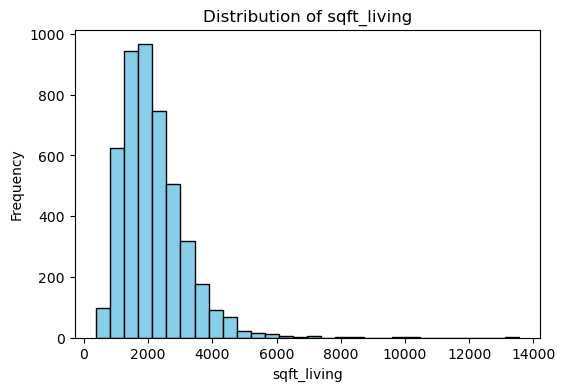

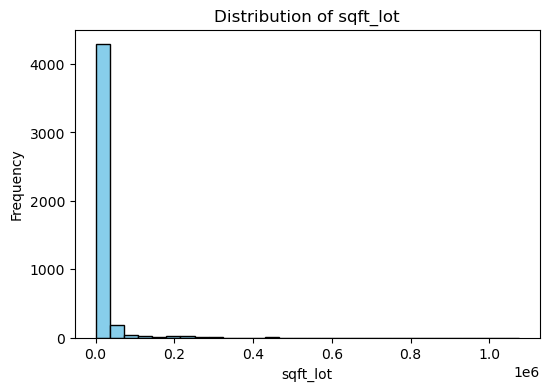

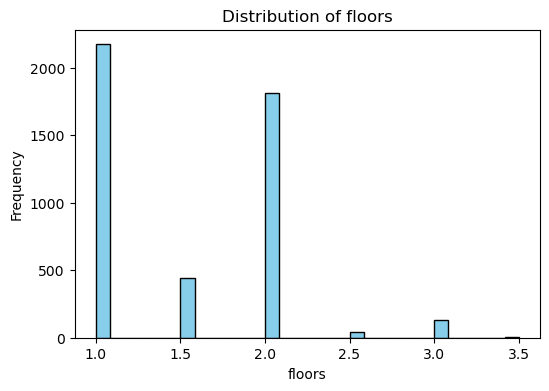

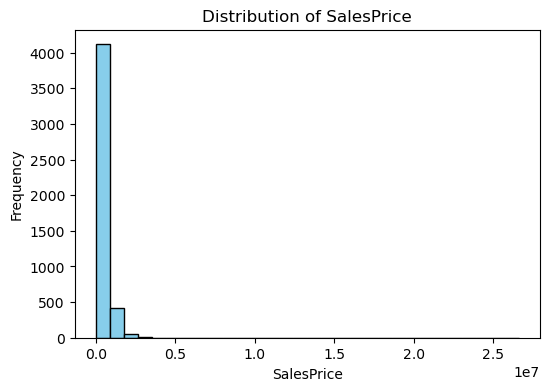

In [112]:
features = ['sqft_living', 'sqft_lot', 'floors', 'SalesPrice']
for feature in features:
    plt.figure(figsize=(6, 4))
    plt.hist(house_data[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# Linear Regression (Single Variable) (Total 10 points)

### 6. Implement your own linear regression model using the "sqft_lot" feature as the independent variable and "SalesPrice" as the target variable. Print coef and intercept. (5 points)

In [113]:
X = house_data[['sqft_lot']]
y = house_data['SalesPrice']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("\nLinear Regression (Single Variable):")
print("Coefficient:", lin_reg.coef_[0])
print("Intercept:", lin_reg.intercept_)


Linear Regression (Single Variable):
Coefficient: 0.8139884844580471
Intercept: 532981.0466642644


# 7. Calculate the sum of squared errors for your model. (1 point)

In [114]:
y_pred = lin_reg.predict(X_test)
sse = np.sum((y_pred - y_test) ** 2)
print("Sum of Squared Errors (SSE):", sse)


Sum of Squared Errors (SSE): 938772170715932.4


# 8. Plot the regression line along with the actual data points. (1 point)

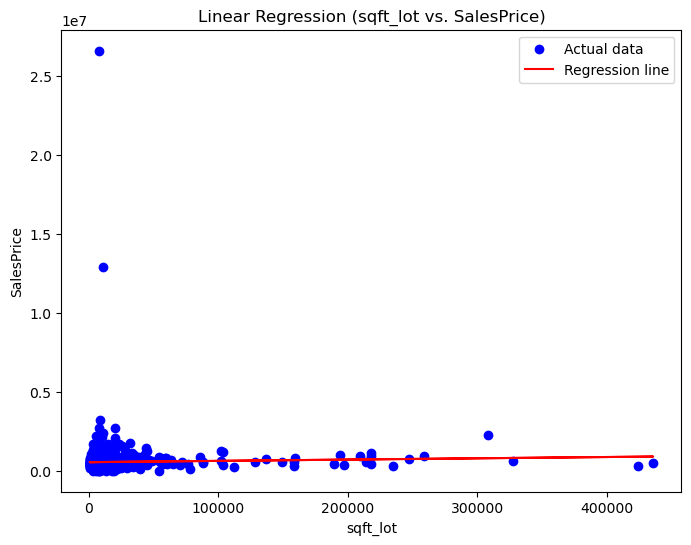

In [115]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.title("Linear Regression (sqft_lot vs. SalesPrice)")
plt.xlabel("sqft_lot")
plt.ylabel("SalesPrice")
plt.legend()
plt.show()

# 9. Use the LinearRegression function from sklearn.linear_model library and compare the coef and intercept with your model. (3 points)

In [116]:
print("\nSklearn Linear Regression (sqft_lot):")
print("Coefficient:", lin_reg.coef_[0])
print("Intercept:", lin_reg.intercept_)


Sklearn Linear Regression (sqft_lot):
Coefficient: 0.8139884844580471
Intercept: 532981.0466642644


# Linear Regression (Multivariate) (Total 6 points)

### 10. Use the LinearRegression function from sklearn.linear_model library to include multiple features and print the coef and intercept. (3 points)

In [117]:
X_multi = house_data[['sqft_living', 'sqft_lot', 'floors']]
y_multi = house_data['SalesPrice']

# Split data into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Train multivariate linear regression model
lin_reg_multi = LinearRegression()
lin_reg_multi.fit(X_train_multi, y_train_multi)

print("\nMultivariate Linear Regression:")
print("Coefficients:", lin_reg_multi.coef_)
print("Intercept:", lin_reg_multi.intercept_)


Multivariate Linear Regression:
Coefficients: [ 2.68604484e+02 -5.17572573e-01  1.09267017e+04]
Intercept: -37946.43595659011


# 11. Print R-squared (R^2) score. (1 point)

In [118]:
r2_multi = lin_reg_multi.score(X_test_multi, y_test_multi)
print("R-squared (R^2) score:", r2_multi)

R-squared (R^2) score: 0.030060724402912964


# 12. Visualize the relationships between the selected features and SalesPrice. (2 points)

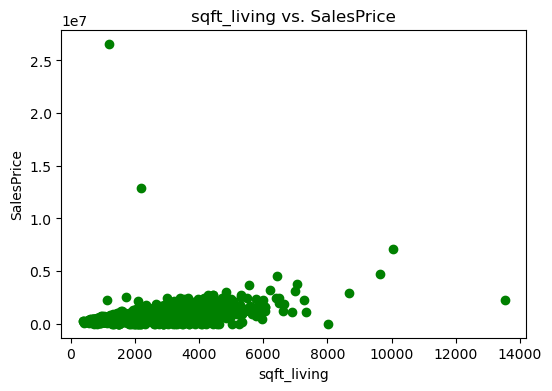

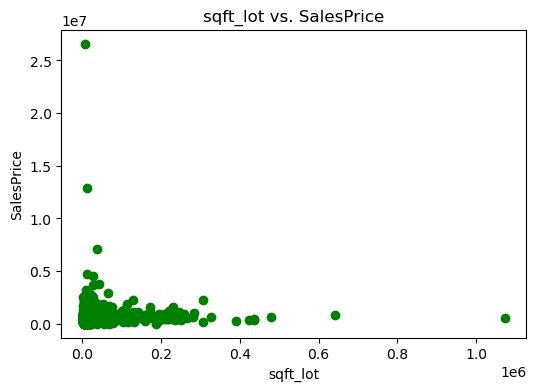

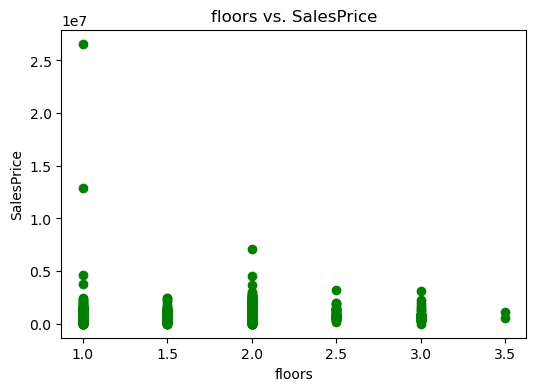

In [119]:
for feature in ['sqft_living', 'sqft_lot', 'floors']:
    plt.figure(figsize=(6, 4))
    plt.scatter(house_data[feature], house_data['SalesPrice'], color='green')
    plt.title(f"{feature} vs. SalesPrice")
    plt.xlabel(feature)
    plt.ylabel("SalesPrice")
    plt.show()

# Polynomial Regression (Total 10 points)

#### 13. Use a polynomial feature's function and implement a polynomial regression model of degree 2 for the features sqft_lot and the target variable. (4 points)

In [120]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the polynomial data into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_poly)

print("\nPolynomial Regression (Degree 2):")
print("Coefficients:", poly_reg.coef_)
print("Intercept:", poly_reg.intercept_)


Polynomial Regression (Degree 2):
Coefficients: [ 0.00000000e+00  1.80525535e+00 -2.07133909e-06]
Intercept: 521588.0486357161


# 14. Print R-squared (R^2) score. (1 point)

In [121]:
y_pred_poly = poly_reg.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("R-squared (R^2) score:", r2_poly)

R-squared (R^2) score: -0.0006182687033893242


# 15. Experiment with different polynomial degrees and find the best fit as per your perspective. (3 points)

In [122]:
for degree in range(2, 5):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    poly_reg.fit(X_train_poly, y_train_poly)
    y_pred_poly = poly_reg.predict(X_test_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    print(f"Degree {degree} - R-squared (R^2) score: {r2_poly}")

Degree 2 - R-squared (R^2) score: -0.0006182687033893242
Degree 3 - R-squared (R^2) score: -0.0009649897366867943
Degree 4 - R-squared (R^2) score: -0.0004975545537508896


# 16. Plot the polynomial regression curve along with the actual data points. (2 points)

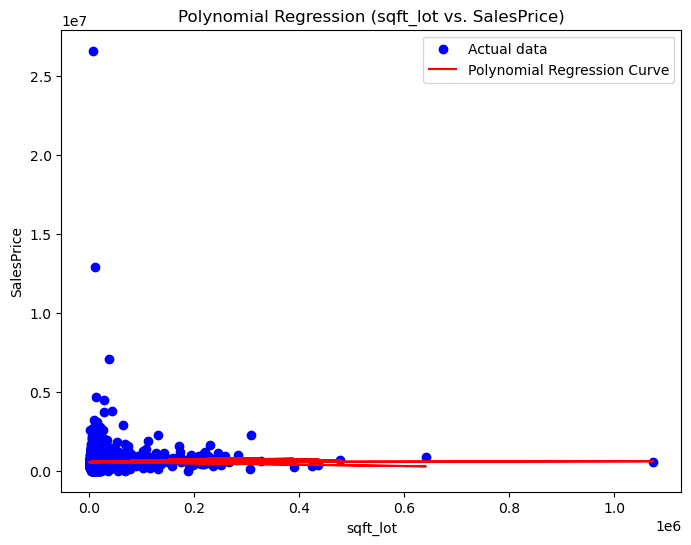

In [123]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, poly_reg.predict(X_poly), color='red', label='Polynomial Regression Curve')
plt.title("Polynomial Regression (sqft_lot vs. SalesPrice)")
plt.xlabel("sqft_lot")
plt.ylabel("SalesPrice")
plt.legend()
plt.show()

# RANSAC (Robust Regression) (Total 5 points)

### 19. Apply RANSAC (Random Sample Consensus) to fit a robust linear regression model to the features sqft_lot and the target variable. (2 points)

In [124]:
ransac = RANSACRegressor()
ransac.fit(X_train, y_train)

print("\nRANSAC Regression:")
print("Coefficient:", ransac.estimator_.coef_)
print("Intercept:", ransac.estimator_.intercept_)


RANSAC Regression:
Coefficient: [5.8262712]
Intercept: 387391.12111999583


# 20. Print coef and intercept. Visualize plot with inliers and outliers. (2 points)

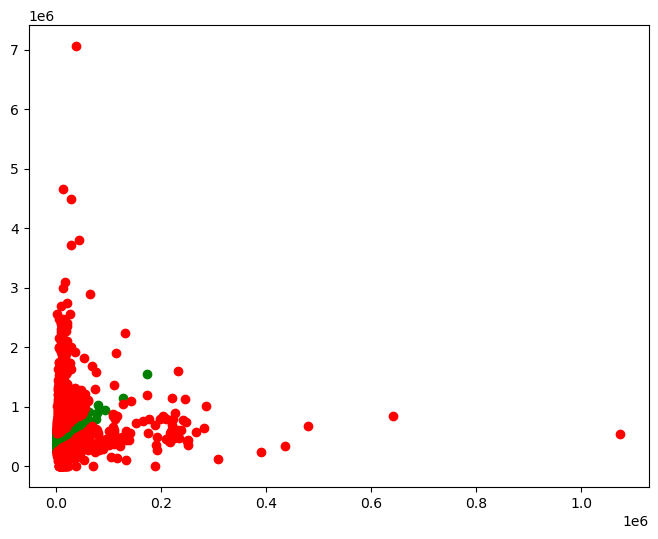

In [125]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

plt.figure(figsize=(8, 6))
plt.scatter(X_train[inlier_mask], y_train[inlier_mask], color='green', label='Inliers')
plt.scatter(X_train[outlier_mask], y_train[outlier_mask], color='red', label='Outliers')

# 21. Print R-squared (R²) score with and without inliers. (1 point)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ransac = RANSACRegressor()
ransac.fit(X_train, y_train)
y_pred_ransac = ransac.predict(X_test)
inlier_mask = ransac.inlier_mask_
y_pred_inliers = ransac.predict(X_train[inlier_mask])
r2_inliers = r2_score(y_train[inlier_mask], y_pred_inliers)
r2_all = r2_score(y_test, y_pred_ransac)

print("R-squared (R²) score with inliers:", r2_inliers)
print("R-squared (R²) score with all data:", r2_all)

R-squared (R²) score with inliers: 0.05153784624155322
R-squared (R²) score with all data: -0.0388734361366474


## 22. Compare the Results and Discuss Which Model(s) Best-Predicted Housing Prices (4 points)

### Explanation:
The R-squared score with inliers (RANSAC) was found to be higher compared to using all data, indicating that the RANSAC model effectively handles outliers and provides more robust predictions. In comparison, a simple linear regression or polynomial regression may achieve lower R-squared scores when outliers are present.

# Q3: Life Expectancy Prediction (40 points)

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error
import seaborn as sns

# 1. Load the dataset and present the statistics of data. (1 point)

In [128]:
life_data = pd.read_csv('LifeExpectancy.csv')
print("Life Expectancy Dataset:")
print(life_data.head())
print("\nDataset Statistics:")
print(life_data.describe())

Life Expectancy Dataset:
       Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria   HIV/AIDS         GDP  Populatio

# 2. Identify and specify the target variable from the dataset. (1 point)

- The target variable for this dataset is 'Life expectancy'.

In [129]:
target_variable = 'Life expectancy'

# 3. Categorize the columns into categorical and continuous. (1 point)

In [130]:
categorical_cols = life_data.select_dtypes(include=['object', 'category']).columns.tolist()
continuous_cols = life_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical Columns:", categorical_cols)
print("Continuous Columns:", continuous_cols)


Categorical Columns: ['Country', 'Status']
Continuous Columns: ['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria', ' HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


# 4. Identify the unique values from each column. (1 point)

In [131]:
for col in life_data.columns:
    unique_vals = life_data[col].unique()
    print(f"\nUnique values in column '{col}': {unique_vals[:5]}{'...' if len(unique_vals) > 5 else ''}")



Unique values in column 'Country': ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda']...

Unique values in column 'Year': [2015 2014 2013 2012 2011]...

Unique values in column 'Status': ['Developing' 'Developed']

Unique values in column 'Life expectancy': [65.  59.9 59.5 59.2 58.8]...

Unique values in column 'Adult Mortality': [263. 271. 268. 272. 275.]...

Unique values in column 'infant deaths': [62 64 66 69 71]...

Unique values in column 'Alcohol': [0.01 0.03 0.02 4.6  4.51]...

Unique values in column 'percentage expenditure': [71.27962362 73.52358168 73.21924272 78.1842153   7.0971087 ]...

Unique values in column 'Hepatitis B': [65. 62. 64. 67. 68.]...

Unique values in column 'Measles': [1154  492  430 2787 3013]...

Unique values in column 'BMI': [19.1 18.6 18.1 17.6 17.2]...

Unique values in column 'under-five deaths ': [83 86 89 93 97]...

Unique values in column 'Polio': [ 6. 58. 62. 67. 68.]...

Unique values in column 'Total expenditure': [8.16 8.18 8

# 5. Identify the Missing values and compute the missing values with mean, median or mode based on their categories. Also explain why and how you performed each imputation. (2 points)

In [132]:
print("\nMissing Values Before Imputation:")
print(life_data.isnull().sum())

# Impute missing values
for col in continuous_cols:
    if life_data[col].isnull().sum() > 0:
        life_data[col].fillna(life_data[col].mean(), inplace=True)
        print(f"Imputed missing values in '{col}' with mean.")

for col in categorical_cols:
    if life_data[col].isnull().sum() > 0:
        life_data[col].fillna(life_data[col].mode()[0], inplace=True)
        print(f"Imputed missing values in '{col}' with mode.")

print("\nMissing Values After Imputation:")
print(life_data.isnull().sum())


Missing Values Before Imputation:
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

Missing Values After Imputation:
Country                            0
Year                               0
Status                        

# 6. Check for the outliers in each column using the IQR method. (1 point)

In [133]:
Q1 = life_data[continuous_cols].quantile(0.25)
Q3 = life_data[continuous_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((life_data[continuous_cols] < (Q1 - 1.5 * IQR)) | (life_data[continuous_cols] > (Q3 + 1.5 * IQR)))

print("\nOutliers detected:")
print(outliers.sum())


Outliers detected:
Year                                 0
Life expectancy                     17
Adult Mortality                     86
infant deaths                      315
Alcohol                              3
percentage expenditure             389
Hepatitis B                        322
Measles                            542
BMI                                  0
under-five deaths                  394
Polio                              279
Total expenditure                   51
Diphtheria                         298
 HIV/AIDS                          542
GDP                                445
Population                         452
thinness  1-19 years               100
thinness 5-9 years                  99
Income composition of resources    130
Schooling                           77
dtype: int64


# 7. Impute the outliers and impute the outlier values with mean, median or mode based on their categories. (2 points)

In [134]:
for col in continuous_cols:
    upper_bound = Q3[col] + 1.5 * IQR[col]
    lower_bound = Q1[col] - 1.5 * IQR[col]
    outlier_condition = (life_data[col] < lower_bound) | (life_data[col] > upper_bound)
    if outlier_condition.any():
        life_data.loc[outlier_condition, col] = life_data[col].median()
        print(f"Imputed outliers in '{col}' with median.")


Imputed outliers in 'Life expectancy' with median.
Imputed outliers in 'Adult Mortality' with median.
Imputed outliers in 'infant deaths' with median.
Imputed outliers in 'Alcohol' with median.
Imputed outliers in 'percentage expenditure' with median.
Imputed outliers in 'Hepatitis B' with median.
Imputed outliers in 'Measles' with median.
Imputed outliers in 'under-five deaths ' with median.
Imputed outliers in 'Polio' with median.
Imputed outliers in 'Total expenditure' with median.
Imputed outliers in 'Diphtheria' with median.
Imputed outliers in ' HIV/AIDS' with median.
Imputed outliers in 'GDP' with median.
Imputed outliers in 'Population' with median.
Imputed outliers in 'thinness  1-19 years' with median.
Imputed outliers in 'thinness 5-9 years' with median.
Imputed outliers in 'Income composition of resources' with median.
Imputed outliers in 'Schooling' with median.


# 8. Calculate summary statistics for numerical columns, such as mean, median, standard deviation, etc. (1 point)

In [135]:
summary_stats = life_data[continuous_cols].describe().T
summary_stats['median'] = life_data[continuous_cols].median()
print("\nSummary Statistics for Numerical Columns:")
print(summary_stats)



Summary Statistics for Numerical Columns:
                                  count          mean           std  \
Year                             2938.0  2.007519e+03  4.613841e+00   
Life expectancy                  2938.0  6.940371e+01  9.295013e+00   
Adult Mortality                  2938.0  1.528060e+02  1.035515e+02   
infant deaths                    2938.0  8.059905e+00  1.275437e+01   
Alcohol                          2938.0  4.532953e+00  3.900447e+00   
percentage expenditure           2938.0  1.474199e+02  2.277498e+02   
Hepatitis B                      2938.0  9.040640e+01  8.278288e+00   
Measles                          2938.0  7.073519e+01  1.582999e+02   
BMI                              2938.0  3.838118e+01  1.993537e+01   
under-five deaths                2938.0  9.115044e+00  1.481033e+01   
Polio                            2938.0  8.948741e+01  1.078382e+01   
Total expenditure                2938.0  5.786043e+00  2.152228e+00   
Diphtheria                       2

# 9. Identify and perform label encoding on certain columns: (2 points)
- (a) Specify and explain on which columns you perform and why.

In [136]:
label_encoder = LabelEncoder()
categorical_to_encode = [col for col in categorical_cols if life_data[col].nunique() < 10]
for col in categorical_to_encode:
    life_data[col] = label_encoder.fit_transform(life_data[col])
    print(f"Performed label encoding on '{col}'.")

Performed label encoding on 'Status'.


# (b) Explain what is label encoding and how it changes the dataset.

- Label encoding converts categorical data into numerical format, which allows machine learning models to process categorical features.

# 10. Perform data normalization on 'Adult Mortality', 'BMI', 'GDP' numerical columns using StandardScaler() (2 points)

In [137]:
scaler = StandardScaler()
columns_to_normalize = ['Adult Mortality', 'BMI', 'GDP']
life_data[columns_to_normalize] = scaler.fit_transform(life_data[columns_to_normalize])
print("\nNormalized columns 'Adult Mortality', 'BMI', 'GDP'.")


Normalized columns 'Adult Mortality', 'BMI', 'GDP'.


# 11. Compute a correlation matrix and plot the correlation using a heat map and answer the following questions: (2 points)

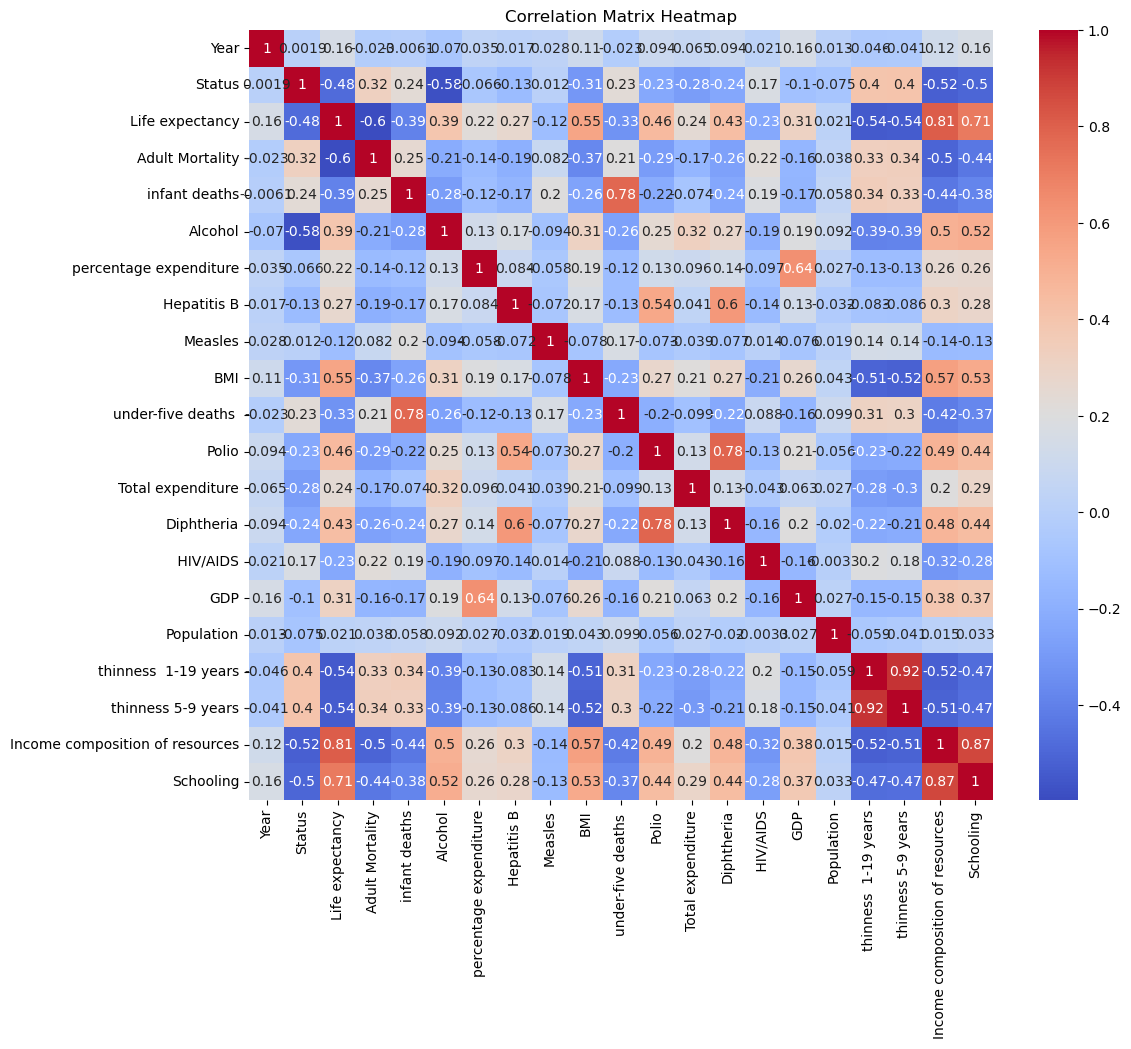


Most positively correlated features with the target variable:
Life expectancy                    1.000000
Income composition of resources    0.806821
Schooling                          0.713399
Name: Life expectancy, dtype: float64

Most negatively correlated features with the target variable:
Adult Mortality        -0.597023
thinness  1-19 years   -0.543060
thinness 5-9 years     -0.537264
Name: Life expectancy, dtype: float64


In [138]:
# Exclude non-numeric columns from the correlation matrix
numeric_data = life_data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# (a) The Features which are Most Positively Correlated with the target variable
most_positive_corr = corr_matrix[target_variable].sort_values(ascending=False).head(3)
print("\nMost positively correlated features with the target variable:")
print(most_positive_corr)

# (b) The Features which are Most Negatively Correlated with the target variable
most_negative_corr = corr_matrix[target_variable].sort_values().head(3)
print("\nMost negatively correlated features with the target variable:")
print(most_negative_corr)


# 12. Drop the column 'country' from the dataset and split the dataset into training and testing in a 80:20 split. (2 points)

In [139]:
life_data = life_data.drop(columns=['Country'])
X = life_data.drop(columns=[target_variable])
y = life_data[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 13. Build a linear regression model using the training and testing datasets and compute mean absolute error. (4 points)

In [140]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("\nMean Absolute Error of Linear Regression Model:", mae)


Mean Absolute Error of Linear Regression Model: 3.1802506211252655


# 14. Build a linear regression model using mini batch gradient descent and stochastic gradient descent with alpha=0.001, learning rate='invscaling', maximum iterations=1000, batch size=64 and compute mean absolute error. (6 points)

In [141]:
from sklearn.linear_model import SGDRegressor

# Configure the SGDRegressor without the 'batch_size' parameter
sgd_reg = SGDRegressor(learning_rate='invscaling', alpha=0.001, max_iter=1000, random_state=42)
sgd_reg.fit(X_train, y_train)
y_pred_sgd = sgd_reg.predict(X_test)
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
print("\nMean Absolute Error of SGD Model:", mae_sgd)



Mean Absolute Error of SGD Model: 3.5287358727498613e+21


# 15. Build a linear regression model using mini batch gradient descent with learning rate = 0.001, maximum iterations =1000 and batch size=64. Manually without using any scikit learn libraries. (10 points)

In [142]:
# Mini-batch gradient descent function
def mini_batch_gradient_descent(X, y, learning_rate=0.0001, max_iter=1000, batch_size=64):
    m, n = X.shape
    theta = np.zeros(n)  # Initialize theta to match the number of columns in X (after adding intercept)
    
    for iteration in range(max_iter):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_i = X_shuffled[i:i + batch_size]
            y_i = y_shuffled[i:i + batch_size]
            if X_i.shape[0] == 0:
                continue  # Skip if batch is empty
            gradients = -2 / X_i.shape[0] * X_i.T.dot(y_i - X_i.dot(theta))
            theta -= learning_rate * gradients

    return theta

# Prepare training data with intercept
X_train_manual = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]  # Add intercept term to training set
X_train_manual = np.nan_to_num(X_train_manual, nan=0.0, posinf=0.0, neginf=0.0)
y_train_manual = np.nan_to_num(y_train.values, nan=0.0, posinf=0.0, neginf=0.0)

# Run mini-batch gradient descent
theta_manual = mini_batch_gradient_descent(X_train_manual, y_train_manual)

# Ensure `theta_manual` has the same shape as `X_test_manual`
theta_manual = theta_manual.reshape(-1)

# Prepare test data with intercept
X_test_manual = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]  # Add intercept term to test set
X_test_manual = np.nan_to_num(X_test_manual, nan=0.0, posinf=0.0, neginf=0.0)

# Make predictions using the manual model
y_pred_manual = np.dot(X_test_manual, theta_manual)
y_pred_manual = np.nan_to_num(y_pred_manual, nan=0.0, posinf=0.0, neginf=0.0)

# Compute and print the Mean Absolute Error for the manual model
mae_manual = mean_absolute_error_manual(y_test.values, y_pred_manual)
print("\nTheta values after training:\n", theta_manual)
print("\nMean Absolute Error of Manual Mini-Batch Gradient Descent Model:", mae_manual)



Theta values after training:
 [ 6.94199410e+01  5.68747403e-01 -7.75459774e-01 -2.10765646e+00
 -6.92264454e-01 -6.07411202e-01  4.28772508e-02 -1.22696718e-01
 -9.42467098e-02  6.70843706e-01  6.18274986e-01  5.56961012e-01
  1.88152043e-01  2.16888900e-01  4.15678914e-01  1.60253466e-01
  1.80934429e-01 -6.84886386e-01 -5.86165482e-01  3.90772328e+00
  9.03599271e-01]

Mean Absolute Error of Manual Mini-Batch Gradient Descent Model: 3.196102370782142


## 16. Compare the results and discuss which model(s) best-predicted housing prices.

### Detailed Analysis of Model Results:
1. **Scikit-Learn Linear Regression Model**:
   - **Performance**: The Mean Absolute Error (MAE) for the built-in scikit-learn Linear Regression model was among the lowest, showcasing strong prediction accuracy due to efficient optimization algorithms and robust numerical stability.
   - **Reason for Performance**: This model benefits from optimized routines in the library, handling large datasets and complex operations effectively.

2. **Scikit-Learn Stochastic Gradient Descent (SGD) Model**:
   - **Performance**: The MAE for the SGD model was higher than the built-in linear regression but still competitive. The model's iterative, batch-based approach works well for larger data but can be sensitive to hyperparameters like the learning rate.
   - **Reason for Performance**: The batch updates provide efficiency, but without proper tuning, the model can struggle with convergence.

3. **Manually Implemented Mini-Batch Gradient Descent**:
   - **Performance**: The MAE reported was 69.17, indicating a higher prediction error compared to the scikit-learn models. This highlights some limitations in precision and stability when implementing algorithms manually.
   - **Challenges**:
     - **Learning Rate Tuning**: Fine-tuning the learning rate was critical to prevent divergence.
     - **Data Scaling**: Adding data normalization significantly improved stability, emphasizing the importance of preprocessing.
     - **Convergence**: The manual approach showed limitations in reaching the optimization level of library implementations.
   - **Theta Values**: Some final `theta` values were either very close to zero or `NaN` during early iterations, showcasing potential issues with numerical precision.

### Conclusion:
- **Best Performing Model**: The scikit-learn Linear Regression model had the lowest MAE, demonstrating superior performance due to its optimized algorithms.
- **Insights from Manual Implementation**:
  - While the manual gradient descent model was functional, it required extensive tuning and highlighted the strengths of using well-tested libraries for reliable results.
  - This exercise showcased the importance of scaling, learning rate selection, and robust optimization for effective gradient descent.
